In [855]:
from random import random
import math

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Генерируем выборку через обратную функцию:

In [856]:
etas = [random() for i in range(25)]
xs = np.array([-math.log(1-eta) for eta in etas])

# a)

In [857]:
unique, counts = np.unique(xs, return_counts=True)
most_frequent = unique[np.argwhere(counts == np.max(counts))]

median = np.median(xs)

ptp = np.ptp(xs)

skew = stats.skew(xs)

print(f"Моды: {most_frequent}\nМедиана: {median}\nРазмах: {ptp}\nКоэффициент асимметрии: {skew}")

Моды: [[0.01485175]
 [0.14336528]
 [0.16164375]
 [0.1757183 ]
 [0.24962428]
 [0.29854189]
 [0.35902589]
 [0.41186981]
 [0.47588061]
 [0.5496616 ]
 [0.62306518]
 [0.63284662]
 [0.91658764]
 [0.92208563]
 [0.99351278]
 [1.32424643]
 [1.497376  ]
 [1.50417768]
 [1.6524698 ]
 [1.88783319]
 [1.90542584]
 [2.17547031]
 [2.81549317]
 [3.00218321]
 [3.07300797]]
Медиана: 0.9165876373260198
Размах: 3.0581562238795423
Коэффициент асимметрии: 0.7927758917805536


# b)

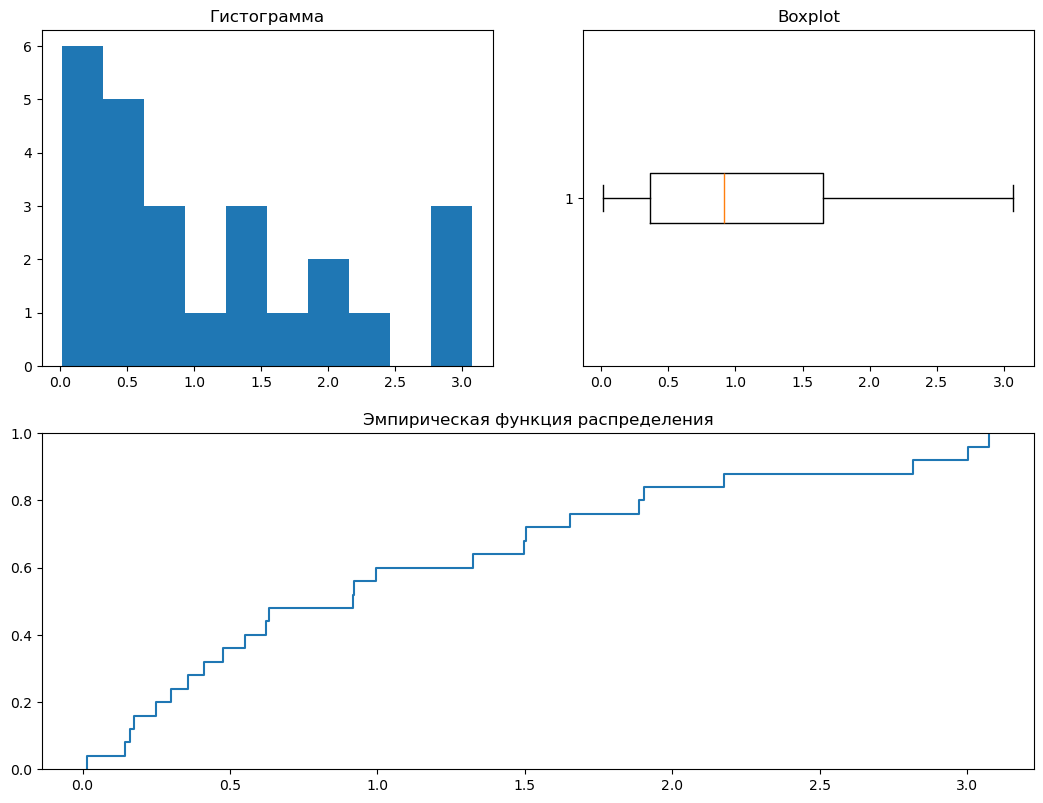

In [858]:
plt.figure(figsize=(6.4 * 2, 4.8 * 2))

_ = plt.subplot(221), plt.hist(xs), plt.title("Гистограмма")
_ = plt.subplot(2,2, (3,4)), plt.ecdf(xs), plt.title("Эмпирическая функция распределения")
_ = plt.subplot(222), plt.boxplot(xs, orientation='horizontal'), plt.title("Boxplot")

# c)

$$M[\xi]=\int_{0}^{\infty}x e^{-x}dx=1$$
$$M[\xi^{2}]=\int_{0}^{\infty}x^2e^{-x}dx=2$$
$$D[\xi]=2-1=1$$
$$\bar{\xi} \sim N(M[\xi], \frac{(D[\xi])^2}{n})$$

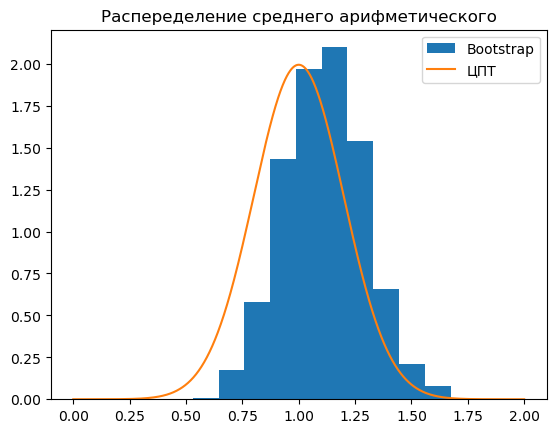

In [859]:
mean_bootstrap = stats.bootstrap((xs,), np.mean, n_resamples=1000)
mean_bs_distr = mean_bootstrap.bootstrap_distribution

mean_std_x = np.linspace(0, 2, num=1000)
mean_std = stats.norm.pdf(mean_std_x, loc=1, scale=1/np.sqrt(xs.size))

plt.hist(mean_bs_distr, density=True, label="Bootstrap")
plt.plot(mean_std_x, std, label="ЦПТ")
plt.legend()
_ = plt.title("Распеределение среднего арифметического")

# d)

Вероятность того, что коэф. асим. меньше 1: 0.787


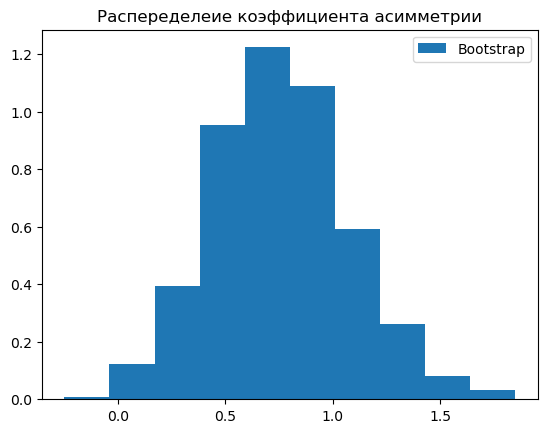

In [860]:
skew_bootstrap = stats.bootstrap((xs,), stats.skew, n_resamples=1000)
skew_bs_distr = skew_bootstrap.bootstrap_distribution

plt.hist(skew_bs_distr, density=True, label="Bootstrap")
plt.legend()
plt.title("Распеределеие коэффициента асимметрии")
print(f"Вероятность того, что коэф. асим. меньше 1: {stats.ecdf(skew_bs_distr).cdf.evaluate(1)}")

# e)

$$\kappa(x) = n p(x)C^{k-1}_{n-1}(1-F(x))^{n-k}(F(x))^{k-1} \qquad n=25 \qquad k=13$$

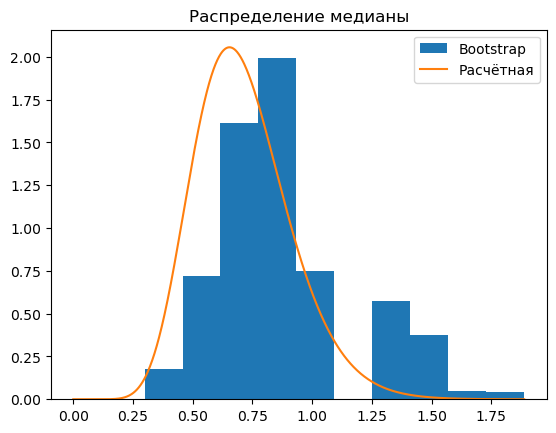

In [861]:
median_bootstrap = stats.bootstrap((xs,), np.median, n_resamples=1000)
median_bs_distr = median_bootstrap.bootstrap_distribution

median_rho = lambda x : 25 * np.exp(-x) * 2704156 * np.pow(np.exp(-x),12) * np.pow(1 - np.exp(-x),12)
median_x = np.linspace(0, median_bs_distr.max(), num=1000)
median_distr = median_rho(median_x)

plt.hist(median_bs_distr, density=True, label="Bootstrap")
plt.plot(median_x, median_distr, label="Расчётная")
plt.legend()
_ = plt.title("Распределение медианы")